In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_data(data_path, data_type):
    if data_type == 'before':
        data_path = os.path.join(data_path, 'A')
    elif data_type == 'after':
        data_path = os.path.join(data_path, 'B')
    elif data_type == 'label':
        data_path = os.path.join(data_path, 'label')
    else:
        print('data_type is not correct')
        return None

    data = []
    for file in os.listdir(data_path):
        img = cv2.imread(os.path.join(data_path, file))
        data.append(img)
    return data

# display images {before, after, labels}
def display_images(before, after, labels):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(cv2.cvtColor(before, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Before')
    axs[0].axis('off')
    axs[1].imshow(cv2.cvtColor(after, cv2.COLOR_BGR2RGB))
    axs[1].set_title('After')
    axs[1].axis('off')
    axs[2].imshow(labels, cmap='gray')
    axs[2].set_title('Labels')
    axs[2].axis('off')
    plt.show()

In [3]:
training_path = '../trainval/'

In [4]:

before_images = read_data(training_path,'before')
after_images = read_data(training_path, 'after')
labels = read_data(training_path,'label')

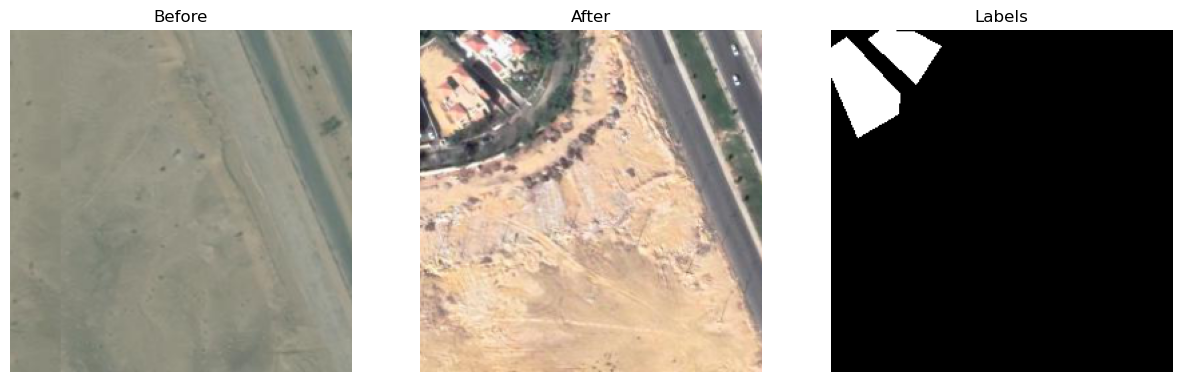

In [5]:
index = 2
# print first image in before_images, after_images, and labels in the same row
display_images(before_images[index], after_images[index], labels[index])

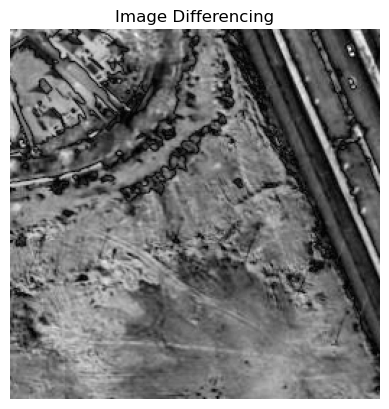

In [6]:
# Implement Change detection using at one classical technique(Image Differencing, Ratioing, CVA, ...).

# Image Differencing
def image_differencing(before, after):
    before = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
    after = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)
    diff = cv2.absdiff(before, after)
    return diff

# display image differencing
diff = image_differencing(before_images[index], after_images[index])
plt.imshow(diff, cmap='gray')
plt.title('Image Differencing')
plt.axis('off')
plt.show()

In [7]:
# Read the images
before = before_images[index]
after = after_images[index]

# Convert BGR to NIR and red bands
nir_band1 = before[:,:,2]  # Assuming NIR is in the third channel
red_band1 = before[:,:,0]

nir_band2 = after[:,:,2]  # Assuming NIR is in the third channel
red_band2 = after[:,:,0]

# Compute NDVI
denominator1 = nir_band1 + red_band1
ndvi1 = np.where(denominator1 == 0, 0, (nir_band1 - red_band1) / denominator1)

denominator2 = nir_band2 + red_band2
ndvi2 = np.where(denominator2 == 0, 0, (nir_band2 - red_band2) / denominator2)

# Normalize NDVI
normalized_ndvi1 = (ndvi1 - np.min(ndvi1)) / (np.max(ndvi1) - np.min(ndvi1))
normalized_ndvi2 = (ndvi2 - np.min(ndvi2)) / (np.max(ndvi2) - np.min(ndvi2))

# Compute the difference
ndvi_difference = normalized_ndvi2 - normalized_ndvi1


C:\Users\marky\AppData\Local\Temp\ipykernel_1572\1270607478.py:14: RuntimeWarning: divide by zero encountered in divide
  ndvi1 = np.where(denominator1 == 0, 0, (nir_band1 - red_band1) / denominator1)
C:\Users\marky\AppData\Local\Temp\ipykernel_1572\1270607478.py:14: RuntimeWarning: invalid value encountered in divide
  ndvi1 = np.where(denominator1 == 0, 0, (nir_band1 - red_band1) / denominator1)
C:\Users\marky\AppData\Local\Temp\ipykernel_1572\1270607478.py:17: RuntimeWarning: divide by zero encountered in divide
  ndvi2 = np.where(denominator2 == 0, 0, (nir_band2 - red_band2) / denominator2)
C:\Users\marky\AppData\Local\Temp\ipykernel_1572\1270607478.py:17: RuntimeWarning: invalid value encountered in divide
  ndvi2 = np.where(denominator2 == 0, 0, (nir_band2 - red_band2) / denominator2)


In [8]:
def jaccard_index(before, after):
    intersection = np.logical_and(before, after)
    union = np.logical_or(before, after)
    return np.sum(intersection) / np.sum(union)

In [ ]:
j_index = jaccard_index(ndvi_difference, labels[index])
print("Jaccard Index:", j_index)